In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

In [3]:
df = pd.read_json('data/train_new.json')

In [126]:
df.head(5)

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,...,"[{u'event_id': 527017, u'cost': 25.0, u'availa...",36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,...,"[{u'event_id': 786878, u'cost': 35.0, u'availa...",149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC
2,premium,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,...,"[{u'event_id': 787337, u'cost': 93.51, u'avail...",214,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA
3,premium,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,...,"[{u'event_id': 885645, u'cost': 25.0, u'availa...",889,1283870102,3,,None,NaN,NaN,None,None
4,premium,1297900800,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,...,"[{u'event_id': 1114349, u'cost': 150.0, u'avai...",35,1288984065,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA


In [127]:
df.acct_type.unique()

array([u'fraudster_event', u'premium', u'spammer_warn', u'fraudster',
       u'spammer_limited', u'spammer_noinvite', u'locked', u'tos_lock',
       u'tos_warn', u'fraudster_att', u'spammer_web', u'spammer'], dtype=object)

In [57]:
print df.columns

Index([         u'acct_type', u'approx_payout_date',        u'body_length',
                 u'channels',            u'country',           u'currency',
          u'delivery_method',        u'description',       u'email_domain',
            u'event_created',          u'event_end',    u'event_published',
              u'event_start',       u'fb_published',                u'gts',
            u'has_analytics',         u'has_header',           u'has_logo',
                   u'listed',               u'name',        u'name_length',
                u'num_order',        u'num_payouts',          u'object_id',
                 u'org_desc',       u'org_facebook',           u'org_name',
              u'org_twitter',         u'payee_name',        u'payout_type',
         u'previous_payouts',      u'sale_duration',     u'sale_duration2',
                 u'show_map',       u'ticket_types',           u'user_age',
             u'user_created',          u'user_type',      u'venue_address',
            

# Creating target

In [128]:
df['category'] = df.acct_type.apply(lambda x: x.split('_')[0])
df['is_fraud'] = (df.category == 'fraudster')

## Drop irrelevant columns

In [129]:
df = df.drop('object_id', axis=1)

df = df.drop(['sale_duration', 'sale_duration2'], axis=1)

df = df.drop('event_published', axis=1)

In [133]:
df.columns

Index([         u'acct_type', u'approx_payout_date',        u'body_length',
                 u'channels',            u'country',           u'currency',
          u'delivery_method',        u'description',       u'email_domain',
            u'event_created',          u'event_end',        u'event_start',
             u'fb_published',                u'gts',      u'has_analytics',
               u'has_header',           u'has_logo',             u'listed',
                     u'name',        u'name_length',          u'num_order',
              u'num_payouts',           u'org_desc',       u'org_facebook',
                 u'org_name',        u'org_twitter',         u'payee_name',
              u'payout_type',   u'previous_payouts',           u'show_map',
             u'ticket_types',           u'user_age',       u'user_created',
                u'user_type',      u'venue_address',      u'venue_country',
           u'venue_latitude',    u'venue_longitude',         u'venue_name',
            

# Categorical variables

In [172]:
def fraud_by(col):
    return df[['is_fraud', col]].groupby(col).mean()

## Cluster map

In [243]:
df[['delivery_method', 'currency', 'is_fraud']].groupby(['delivery_method', 'currency']).agg([len, np.mean])

is_fraud          
                              len      mean
delivery_method currency                   
0.0             AUD           401  0.029925
                CAD           762  0.048556
                EUR           143  0.251748
                GBP          1343  0.229337
                MXN             1  1.000000
                NZD            20  0.000000
                USD          5850  0.137949
1.0             AUD           375  0.000000
                CAD           556  0.008993
                EUR           114  0.008772
                GBP           858  0.025641
                NZD            34  0.000000
                USD          3617  0.012441
3.0             AUD             3  0.000000
                CAD             4  0.000000
                EUR             5  0.000000
                GBP             9  0.111111
                NZD             1  0.000000
                USD           225  0.026667

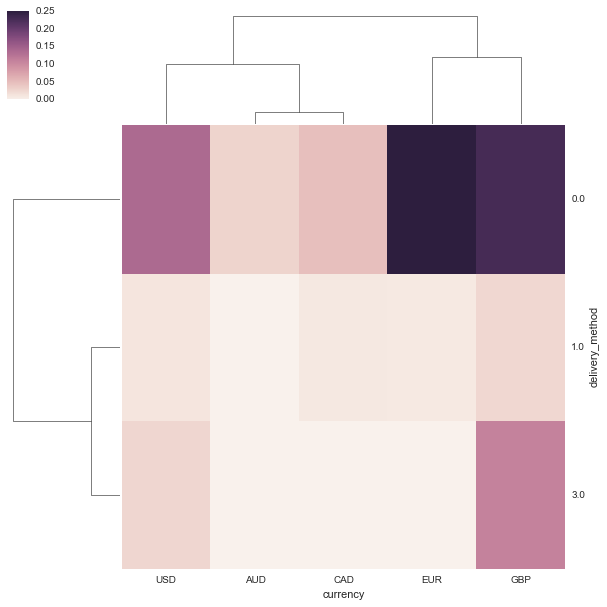

In [135]:
cat_df = df[['delivery_method', 'currency', 'is_fraud']].groupby(['delivery_method', 'currency']).mean()
cat_df.reset_index().pivot('delivery_method', 'currency', 'is_fraud').fillna(0)
sns.clustermap(cat_df.reset_index().pivot('delivery_method', 'currency', 'is_fraud').drop(['MXN', 'NZD'], axis=1).fillna(0))

## Country (count, has_)

In [136]:
df['has_country'] = ~df.country.isnull()
df.country = df.country.fillna('US')

country_counts = df.country.value_counts()
df['country_count'] = df.country.apply(lambda x: country_counts[x])

df['log_country_count'] = np.log(df.country_count)

df = df.drop('country', axis=1)

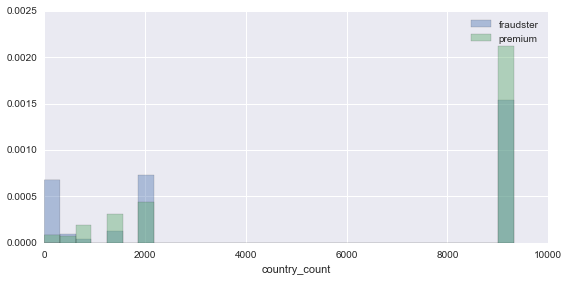

In [137]:
g = sns.FacetGrid(df[df['category'].isin(['premium', 'fraudster'])], hue='category', size=4, aspect=2)
g.map(plt.hist, 'country_count', alpha=.4, normed=True, bins=30)
plt.legend()
plt.show()

## Email popularity

In [139]:
email_counts = df.email_domain.value_counts()
df['email_pop'] = df.email_domain.apply(lambda x: email_counts[x])
df = df.drop('email_domain', axis=1)

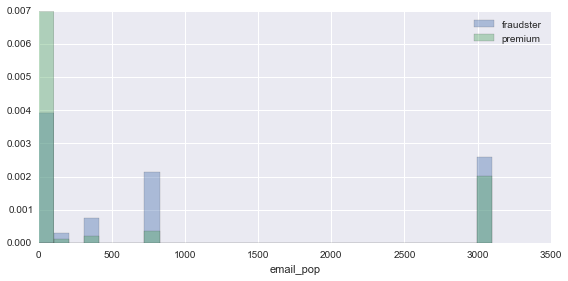

In [140]:
g = sns.FacetGrid(df[df['category'].isin(['premium', 'fraudster'])], hue='category', size=4, aspect=2)
g.map(plt.hist, 'email_pop', alpha=.4, normed=True, bins=30)
plt.legend()
plt.show()

## Published (remove)

In [83]:
df.event_published = df.event_published.fillna(-1)

In [84]:
df['publish_3'] = np.sign(df.event_published)

In [85]:
df[['is_fraud', 'publish_3']].groupby('publish_3').mean()

,is_fraud
publish_3,
-1.0,0.949495
0.0,0.428571
1.0,0.082852


In [ ]:
df = df.drop([   u'event_published',   u'days_to_publish',
             u'is_published',      u'not_published', u'not_null_published',
                u'publish_3'], axis=1)

## Event timing

In [141]:
df['event_duration'] = (df.event_end - df.event_start) / (24*3600)
df[df.event_duration < 0].event_duration = 0

/Users/nathankiner/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [142]:
df['days_to_event_start'] = ((df.event_start - df.event_created) / (24*3600))

In [143]:
df[df.days_to_event_start < 0].days_to_event_start = 0

In [144]:
df[df.is_fraud].days_to_event_start.describe()

count    1293.000000
mean       16.708329
std        58.886338
min     -1093.728970
25%         1.319954
50%         4.186285
75%        18.396806
max       979.785914
Name: days_to_event_start, dtype: float64

In [146]:
df[~df.is_fraud].days_to_event_start.describe()

count    13044.000000
mean        54.065879
std         58.667691
min        -85.858171
25%         20.503571
50%         37.250029
75%         66.745098
max        848.244190
Name: days_to_event_start, dtype: float64

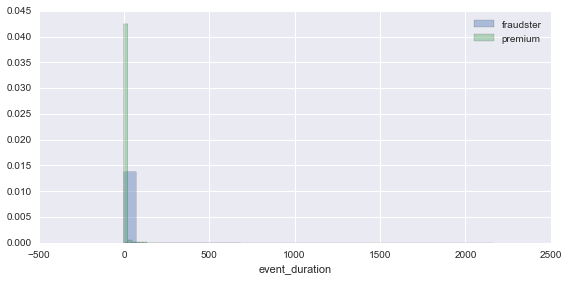

In [147]:
g = sns.FacetGrid(df[df['category'].isin(['premium', 'fraudster'])], hue='category', size=4, aspect=2)
g.map(plt.hist, 'event_duration', alpha=.4, normed=True, bins=30)
plt.legend()
plt.show()

## Body length

In [148]:
df['has_body_length'] = (df.body_length > 0)

df['log_body_length'] = np.log(df.body_length)
df.log_body_length[~df.has_body_length] = -1

/Users/nathankiner/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


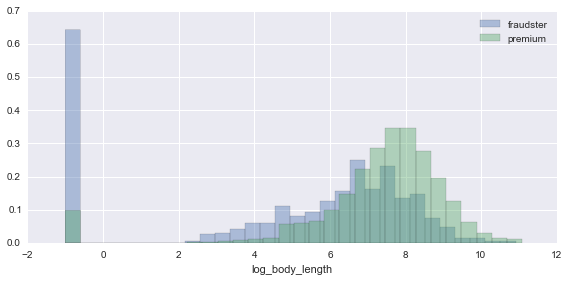

In [149]:
g = sns.FacetGrid(df[df['category'].isin(['premium', 'fraudster'])], hue='category', size=4, aspect=2)
g.map(plt.hist, 'log_body_length', alpha=.4, normed=True, bins=30)
plt.legend()
plt.show()

## Dummies factory

In [237]:
df.previous_payouts[1]

[{u'address': u'1700 North Brown Road',
  u'amount': 34389.38,
  u'country': u'US',
  u'created': u'2010-10-01 01:10:09',
  u'event': 786869,
  u'name': u'RUF',
  u'state': u'GA',
  u'uid': 5419068,
  u'zip_code': u'30043'},
 {u'address': u'1700 North Brown Road',
  u'amount': 764.93,
  u'country': u'US',
  u'created': u'2011-02-02 01:12:10',
  u'event': 786878,
  u'name': u'RUF',
  u'state': u'GA',
  u'uid': 5419068,
  u'zip_code': u'30043'},
 {u'address': u'1700 North Brown Road',
  u'amount': 17405.26,
  u'country': u'US',
  u'created': u'2011-03-15 01:30:42',
  u'event': 1181203,
  u'name': u'RUF',
  u'state': u'GA',
  u'uid': 5419068,
  u'zip_code': u'30043'},
 {u'address': u'1700 North Brown Road',
  u'amount': 2224.16,
  u'country': u'US',
  u'created': u'2011-03-15 01:30:42',
  u'event': 1293213,
  u'name': u'RUF',
  u'state': u'GA',
  u'uid': 5419068,
  u'zip_code': u'30043'},
 {u'address': u'1700 North Brown Road',
  u'amount': 5370.58,
  u'country': u'US',
  u'created': u'20

In [166]:
cat_columns = [col for col in df.columns if df[col].dtype == 'object']
for col in cat_columns:
    try:
        print col, len(df[col].unique())
    except:
        print '// to investigate'

acct_type 12
currency 7
description 13095
name 13940
org_desc 5845
org_name 9501
payee_name 2481
payout_type 3
previous_payouts // to investigate
ticket_types // to investigate
venue_address 10142
venue_country 70
venue_name 9788
venue_state 443
category 5


### Currency

In [156]:
df = df.join(pd.get_dummies(df.currency).drop(['NZD', 'MXN'], axis=1))

### Listed

In [160]:
df.listed = (df.listed == 'y')

### Payout_type

In [174]:
df.payout_type.value_counts()

ACH      10666
CHECK     3178
           493
Name: payout_type, dtype: int64

In [173]:
fraud_by('payout_type')

,is_fraud
payout_type,
,0.914807
ACH,0.076130
CHECK,0.009440


In [175]:
df['is_check'] = (df.payout_type == 'CHECK')

In [176]:
df = df.drop('payout_type', axis=1)

In [192]:
df = df.join(pd.get_dummies(df.delivery_method, prefix='delivery_method').drop('delivery_method_3.0', axis=1))

## Missing values

In [208]:
df.has_header[df.has_header.isnull()] = 0

/Users/nathankiner/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [209]:
df['has_venue'] = ~df.venue_latitude.isnull()

# Plotting histograms

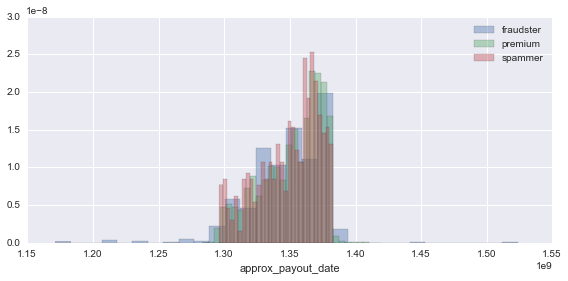

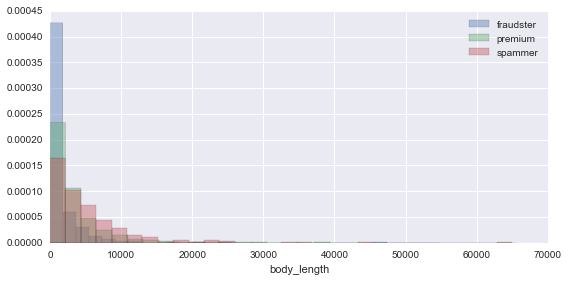

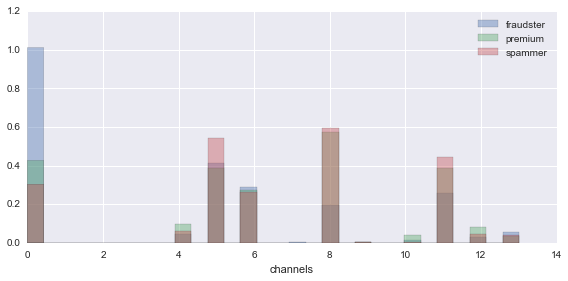

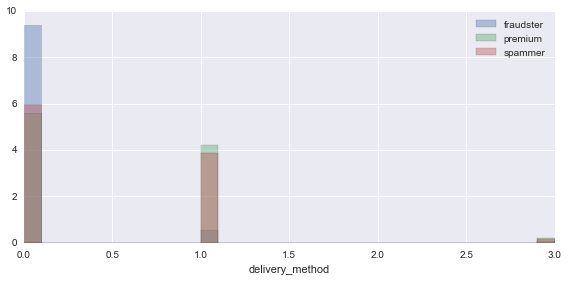

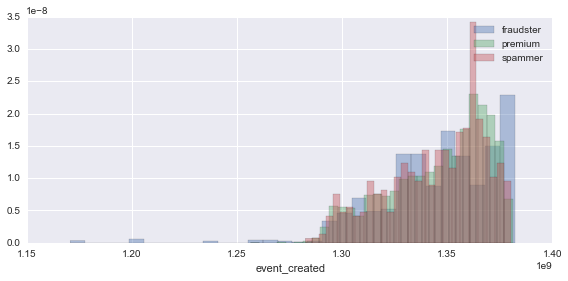

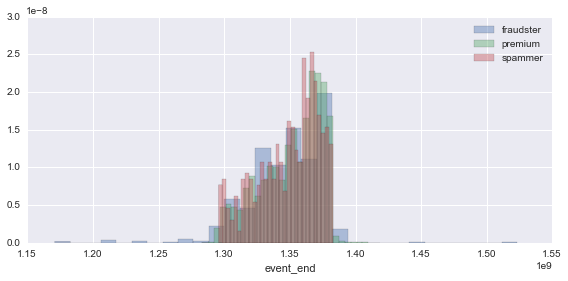

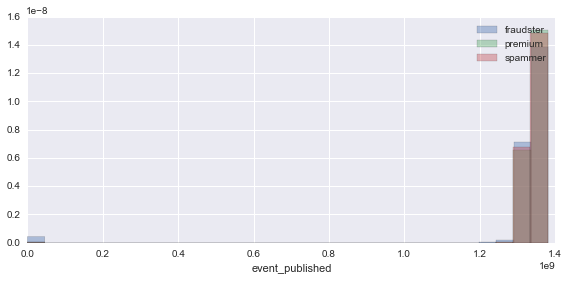

In [40]:
for col in cols[:7]:
    g = sns.FacetGrid(df[df['category'].isin(['premium', 'fraudster', 'spammer'])], hue='category', size=4, aspect=2)
    g.map(plt.hist, col, alpha=.4, normed=True, bins=30)
    plt.legend()
    plt.show()

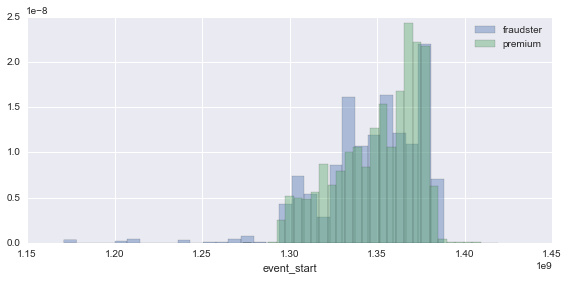

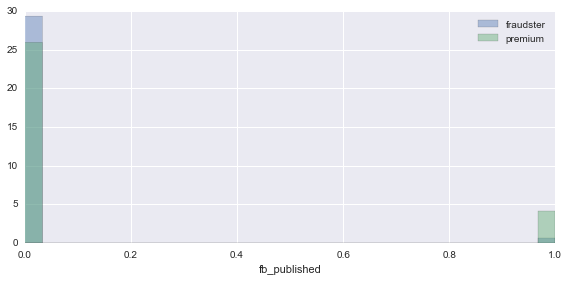

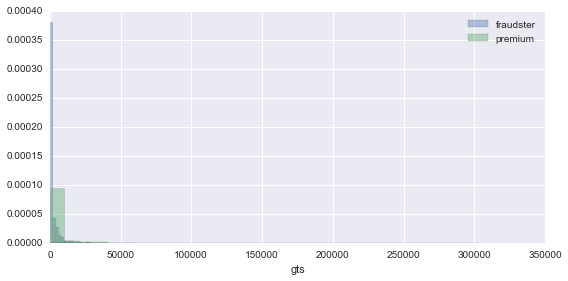

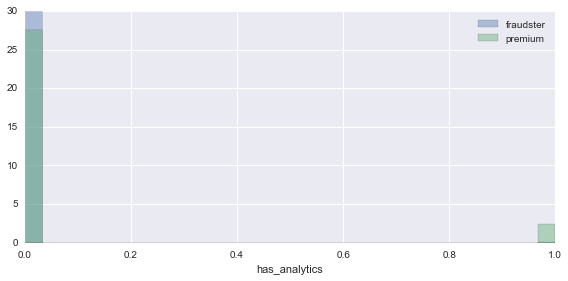

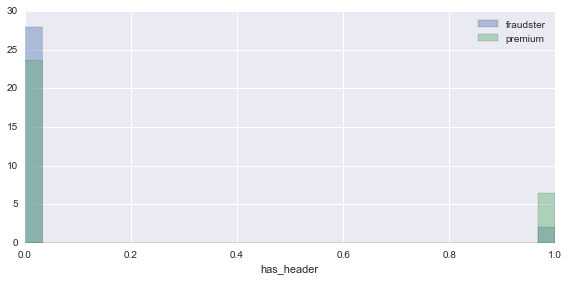

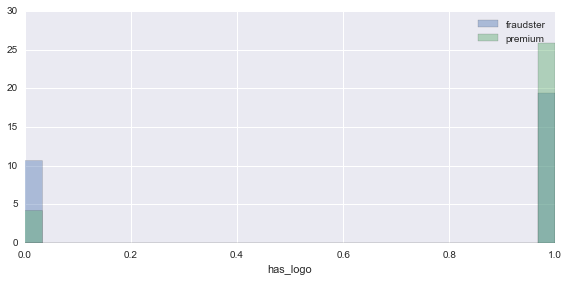

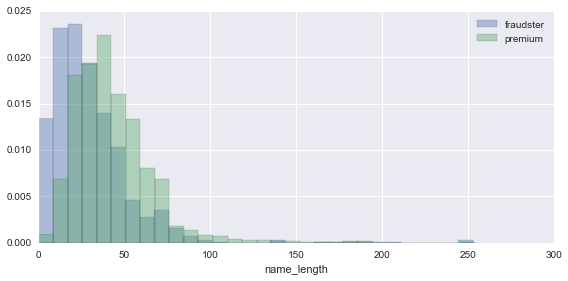

In [36]:
for col in cols[7:14]:
    g = sns.FacetGrid(df[df['category'].isin(['premium', 'fraudster'])], hue='category', size=4, aspect=2)
    g.map(plt.hist, col, alpha=.4, normed=True, bins=30)
    plt.legend()
    plt.show()

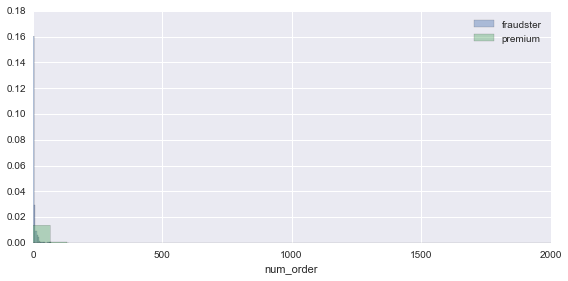

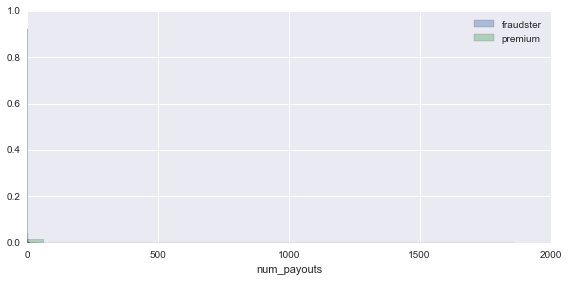

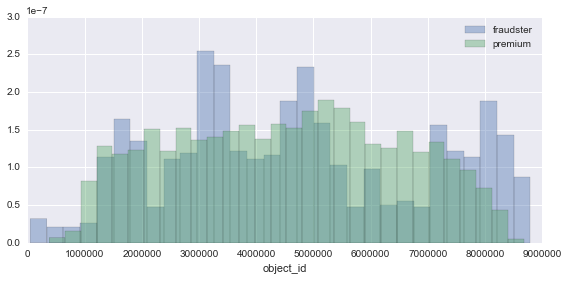

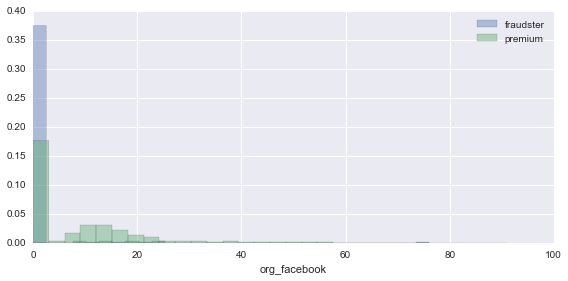

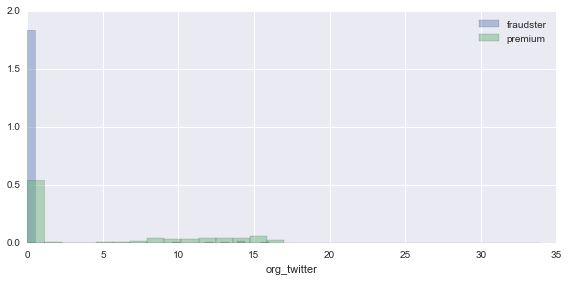

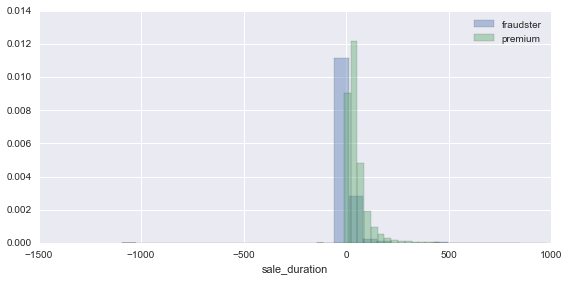

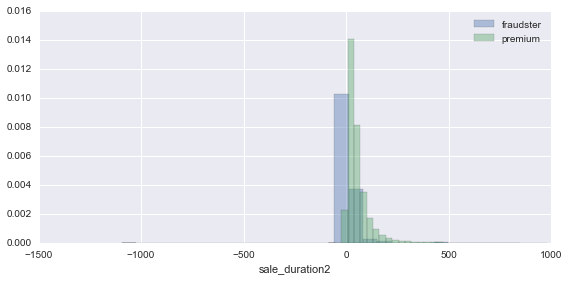

In [37]:
for col in cols[14:21]:
    g = sns.FacetGrid(df[df['category'].isin(['premium', 'fraudster'])], hue='category', size=4, aspect=2)
    g.map(plt.hist, col, alpha=.4, normed=True, bins=30)
    plt.legend()
    plt.show()

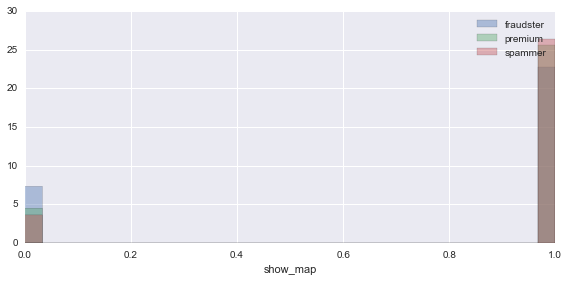

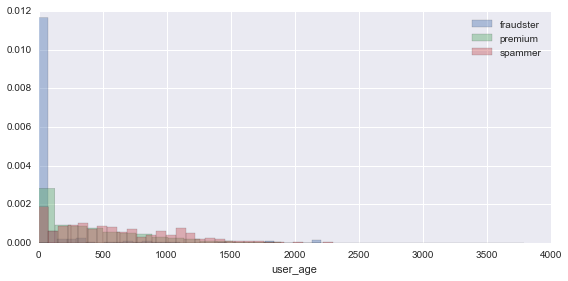

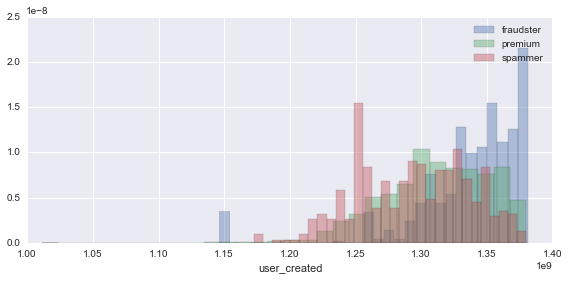

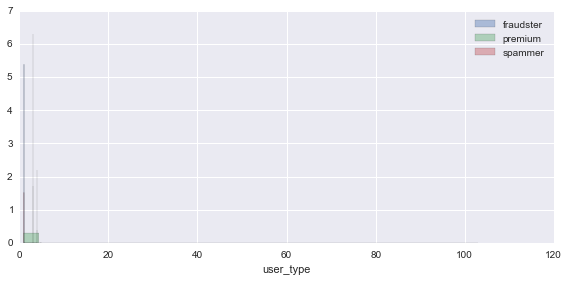

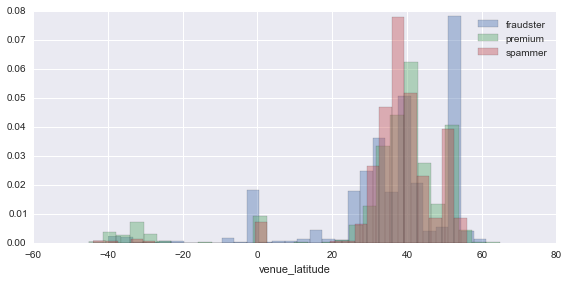

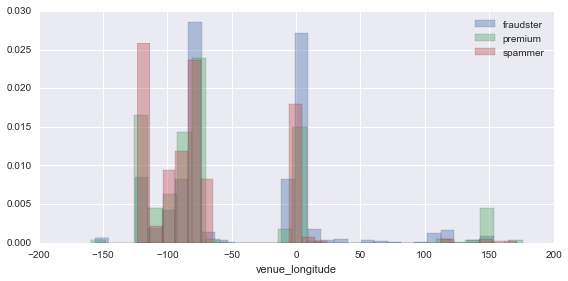

In [39]:
for col in cols[21:]:
    g = sns.FacetGrid(df[df['category'].isin(['premium', 'fraudster', 'spammer'])], hue='category', size=4, aspect=2)
    g.map(plt.hist, col, alpha=.4, normed=True, bins=30)
    plt.legend()
    plt.show()

# Cross-validate

In [180]:
from sklearn.cross_validation import train_test_split, cross_val_score
import xgboost

In [210]:
model_df = df[[col for col in df.columns if df[col].dtype != 'object']]

In [214]:
model_df = model_df.drop(['body_length', 'delivery_method', 'event_created', 'event_end', 'event_start', 'user_created',
 'venue_latitude', 'venue_longitude'], axis=1).dropna()

In [215]:
X = model_df.drop('is_fraud', axis=1).values
y = model_df.is_fraud.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)
from sklearn.linear_model import LogisticRegressionCV
lr1 = LogisticRegressionCV(class_weight='balanced')

In [220]:
xgb = xgboost.XGBClassifier()

In [223]:
cross_val_score(xgb, X_train, y=y_train, scoring='roc_auc',
                        cv=5, n_jobs=-1, verbose=5).mean()

[CV] no parameters to be set .........................................
[CV] no parameters to be set .........................................
[CV] no parameters to be set .........................................
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.993153 -   1.4s
[CV] ................ no parameters to be set, score=0.995190 -   1.4s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.988505 -   1.4s
[CV] ................ no parameters to be set, score=0.986415 -   1.4s
[CV] ................ no parameters to be set, score=0.992302 -   1.0s


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.9s finished


0.99111290334255941

In [224]:
import BuildModel as bm

model = bm.BuildModel(X, y, {}, model=xgboost.XGBClassifier)

model.test(.1, 5, 'recall')

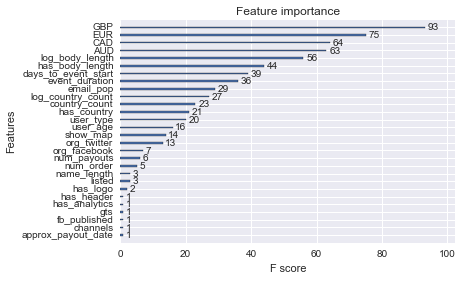

In [240]:
xgb.fit(X_train, y_train)
plot = xgboost.plot_importance(xgb)
ticks = plot.set_yticklabels(model_df.drop('is_fraud', axis=1).columns)

In [244]:
model_df.drop('is_fraud', axis=1).columns

Index([ u'approx_payout_date',            u'channels',        u'fb_published',
                       u'gts',       u'has_analytics',          u'has_header',
                  u'has_logo',              u'listed',         u'name_length',
                 u'num_order',         u'num_payouts',        u'org_facebook',
               u'org_twitter',            u'show_map',            u'user_age',
                 u'user_type',         u'has_country',       u'country_count',
         u'log_country_count',           u'email_pop',      u'event_duration',
       u'days_to_event_start',     u'has_body_length',     u'log_body_length',
                       u'AUD',                 u'CAD',                 u'EUR',
                       u'GBP',                 u'USD',            u'is_check',
       u'delivery_method_0.0', u'delivery_method_1.0',           u'has_venue'],
      dtype='object')

In [247]:
pd.get_dummies(df.delivery_method.astype(int), prefix='delivery_method')

ValueError: Cannot convert NA to integer

In [259]:
df.delivery_method.fillna(df.delivery_method.mode()[0]).astype(int).value_counts()

0    8536
1    5554
3     247
Name: delivery_method, dtype: int64

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14337 entries, 0 to 14336
Data columns (total 44 columns):
acct_type             14337 non-null object
approx_payout_date    14337 non-null int64
body_length           14337 non-null int64
channels              14337 non-null int64
country               14256 non-null object
currency              14337 non-null object
delivery_method       14321 non-null float64
description           14337 non-null object
email_domain          14337 non-null object
event_created         14337 non-null int64
event_end             14337 non-null int64
event_published       14238 non-null float64
event_start           14337 non-null int64
fb_published          14337 non-null int64
gts                   14337 non-null float64
has_analytics         14337 non-null int64
has_header            8928 non-null float64
has_logo              14337 non-null int64
listed                14337 non-null object
name                  14337 non-null object
name_length      

In [8]:
a = df.venue_name

In [14]:
np.log(df.body_length).replace(-np.inf, -1)

0        8.256348
1        8.160232
2        7.863651
3        9.421168
4        7.790282
5        4.762174
6        3.332205
7        6.881411
8        8.386629
9        6.881411
10       8.388678
11       7.425954
12       8.978787
13       8.873188
14       9.216024
15       7.387090
16       7.374629
17       4.997212
18       8.127700
19       8.706987
20       8.169053
21       6.113682
22       6.609349
23       6.697034
24       7.301822
25       8.087640
26       6.768493
27       6.163315
28       6.987490
29       7.550135
           ...   
14307   -1.000000
14308    8.915164
14309    8.654517
14310    8.516993
14311    6.396930
14312    6.722630
14313   -1.000000
14314    8.764678
14315    7.039660
14316    8.094378
14317    8.716208
14318    6.104793
14319    9.166806
14320    6.807935
14321    7.775276
14322   -1.000000
14323    8.478244
14324    9.221082
14325    6.903747
14326    6.293419
14327    8.700681
14328    9.005650
14329    9.386812
14330    5.480639
14331    8

In [15]:
df['event_duration'] = (df.event_end - df.event_start) / (24*3600)

In [20]:
((pd.to_datetime(df.event_end, unit='s') - pd.to_datetime(df.event_start, unit='s')) / np.timedelta64(1, 'D') < 0).mean()

0.00027899839575922441

In [40]:
with open('data/example.json') as f:
    example = json.loads(f.read())

ValueError: arrays must all be same length

In [48]:
pd.DataFrame(pd.Series(example)).T

,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,event_end,...,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state
0,1357866000,846,4,US,USD,0,"<p>&nbsp;</p>\r\n<p class=""MsoNormal""><img sty...",gmail.com,1349816437,1357434000,...,"[{u'event_id': 4551690, u'cost': 41.53, u'avai...",399,1315345153,1,1008 Union St,US,31.1431,-81.491,,


0        US
1        US
2        US
3        IE
4        US
5        US
6        US
7        US
8        US
9        US
10       US
11       US
12       US
13       US
14       US
15       US
16       US
17       US
18       US
19       US
20       FR
21       US
22       US
23       US
24       US
25       US
26       US
27       US
28       US
29       US
         ..
14307    US
14308    US
14309    GB
14310    US
14311    US
14312    US
14313    US
14314      
14315    NL
14316    GB
14317    US
14318    US
14319    AT
14320    GB
14321    AU
14322    US
14323    GB
14324    US
14325    US
14326      
14327    US
14328    GB
14329    GB
14330    US
14331    US
14332    US
14333    US
14334      
14335    US
14336    GB
Name: country, dtype: object